In [1]:
import numpy as np 
import pandas as pd 
import os 


In [ ]:
rows = [
    {"x": 1.2, "y": 3.4, "t": 0},
    {"x": 1.4, "y": 3.6, "t": 1},
    {"x": 1.6, "y": 3.8, "t": 2},
    {"x": 1.8, "y": 4.0, "t": 3},
    {"x": 2.6, "y": 3.8, "t": 4},
    {"x": 2.8, "y": 13.0, "t": 5},
]

for i in range(len(rows)):
    rows=
    df=pd.DataFrame(rows)
    print(df)

     x     y  t
0  2.8  13.0  5
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [20]:
def function(x):
    return -0.2*x + 140

print(function(1238))

-107.60000000000002


In [19]:
X=np.linspace(-1140,1150,49)
Y=function(X)
T1=np.linspace(0,48,49)

Array1=np.column_stack((X,Y,T1))
X2=np.linspace(1250,-525,49)

Y2=function(X2)
T2=np.linspace(49,97,49)
Array2 = np.column_stack((X2,Y2,T2))

Array=np.concatenate((Array1,Array2))
print(T2)
np.save("reference",np.array([Array1]))

[49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66.
 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84.
 85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95. 96. 97.]


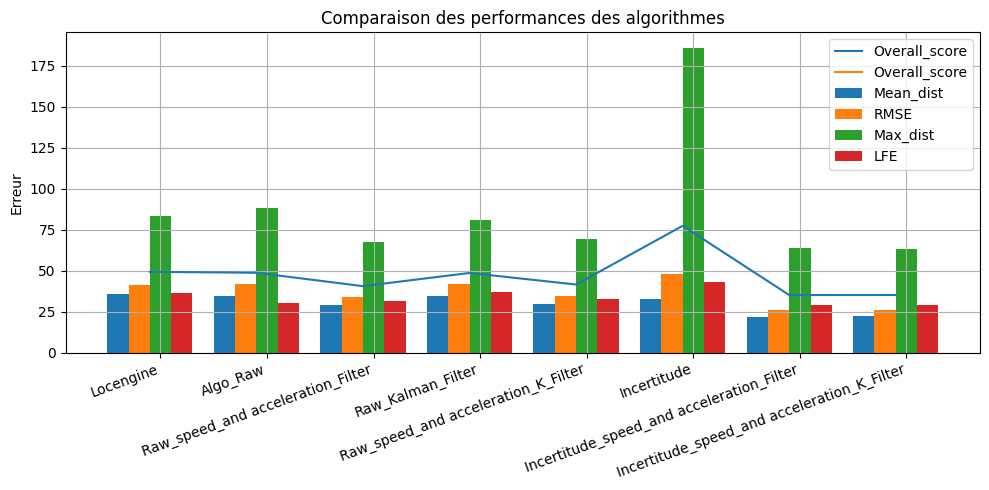

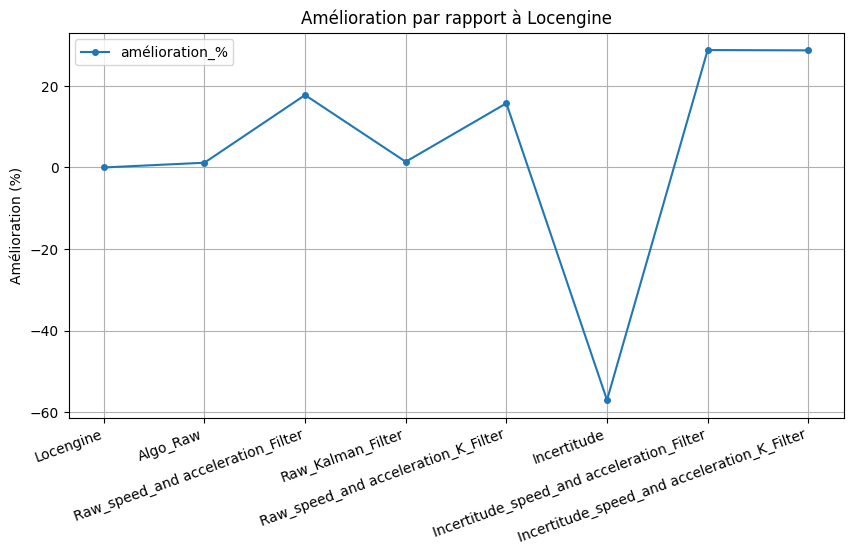

Meilleur Mean_dist : Incertitude_speed_and acceleration_Filter
Meilleur RMSE      : Incertitude_speed_and acceleration_Filter
Meilleur Max_dist  : Incertitude_speed_and acceleration_K_Filter


,algo,LFE,Mean_dist,RMSE,Max_dist,Overall_score,amélioration_%
0,Locengine,36.420000,35.860000,41.320000,83.260000,49.220000,0.000000
1,Algo_Raw,30.350000,34.640000,41.580000,88.020000,48.650000,1.160000
2,Raw_speed_and acceleration_Filter,31.680000,29.200000,33.760000,67.300000,40.480000,17.760000
3,Raw_Kalman_Filter,37.030000,34.660000,41.680000,80.760000,48.530000,1.400000
4,Raw_speed_and acceleration_K_Filter,32.380000,29.800000,34.520000,69.230000,41.480000,15.730000
5,Incertitude,43.060000,32.520000,47.610000,185.960000,77.290000,-57.030000
6,Incertitude_speed_and acceleration_Filter,28.710000,21.790000,25.860000,63.840000,35.050000,28.790000
7,Incertitude_speed_and acceleration_K_Filter,28.900000,22.340000,26.230000,62.900000,35.090000,28.710000


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Lire le fichier CSV
# =========================
# Remplace le chemin par ton fichier
df = pd.read_csv("perf.csv")

# =========================
#  Calcul des moyennes
# =========================
df["Mean_dist"] = df[["Mean_dist_1", "Mean_dist_2"]].mean(axis=1).round(2)
df["RMSE"] = df[["RMSE_1", "RMSE_2"]].mean(axis=1).round(2)
df["Max_dist"] = df[["Max_dist_1", "Max_dist_2"]].mean(axis=1).round(2)
# =========================
#  Meilleure version globale
# =========================
df["Overall_score"] = df[["Mean_dist", "RMSE", "Max_dist","LFE"]].mean(axis=1).round(2)

ref_series = df.loc[df["algo"] == "Locengine", "Overall_score"]
if ref_series.empty:
    raise ValueError("No 'Locengine' row found in df")
ref = float(ref_series.iloc[0])
if ref == 0:
    df["amélioration_%"] = np.nan
else:
    df["amélioration_%"] = ((ref - df["Overall_score"]) * 100 / ref).round(2)



best_overall = df.loc[df["Overall_score"].idxmin(), "algo"]

# =========================
#  Histogramme (3 barres / algo)
# =========================
x = np.arange(len(df["algo"]))
width = 0.2

plt.figure(figsize=(10, 5))
plt.bar(x - 2*width, df["Mean_dist"], width, label="Mean_dist")
plt.bar(x - width, df["RMSE"], width, label="RMSE")
plt.bar(x , df["Max_dist"], width, label="Max_dist")
plt.bar(x + width, df["LFE"], width, label="LFE")
plt.plot(x -0.5*width, df["Overall_score"], width, label="Overall_score")

plt.xticks(x, df["algo"], rotation=20, ha="right")
plt.ylabel("Erreur")
plt.title("Comparaison des performances des algorithmes")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

plt.plot(x , df["amélioration_%"],marker='o',markersize=4, label="amélioration_%")
plt.xticks(x, df["algo"], rotation=20, ha="right")
plt.ylabel("Amélioration (%)")
plt.title("Amélioration par rapport à Locengine")
plt.legend()
plt.grid()
plt.show()
# =========================
#  Meilleur algo par métrique
# =========================
best_mean = df.loc[df["Mean_dist"].idxmin(), "algo"]
best_rmse = df.loc[df["RMSE"].idxmin(), "algo"]
best_max = df.loc[df["Max_dist"].idxmin(), "algo"]

print("Meilleur Mean_dist :", best_mean)
print("Meilleur RMSE      :", best_rmse)
print("Meilleur Max_dist  :", best_max)



# =========================
#  Sauvegarde
# =========================
df.drop(columns=["Mean_dist_1", "Mean_dist_2", "RMSE_1", "RMSE_2", "Max_dist_1", "Max_dist_2"], inplace=True)
df.to_csv("results_with_means.csv", index=False)
df.style.set_caption("Comparaison des algorithmes").background_gradient(cmap='Blues')


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def linearity_error(t, x, y):
    t = t.reshape(-1, 1)

    # Régression x(t)
    reg_x = LinearRegression().fit(t, x)
    x_pred = reg_x.predict(t)
    rmse_x = np.sqrt(mean_squared_error(x, x_pred))

    # Régression y(t)
    reg_y = LinearRegression().fit(t, y)
    y_pred = reg_y.predict(t)
    rmse_y = np.sqrt(mean_squared_error(y, y_pred))

    # Score global
    lfe = (rmse_x + rmse_y) / 2

    return lfe



In [4]:
for file in os.listdir("test_site/trajectories"):
    
    Traj= np.load(os.path.join("test_site/trajectories",file))[0,:]
    T=Traj[:,2]
    X=Traj[:,0]
    Y=Traj[:,1]
    results = linearity_error(T, X, Y)
    print(f"Results for {file}: {results}")
    

Results for Raw_M_K_Filter_2_001BC50C70027E08.npy: 32.3852425048757
Results for Raw_001BC50C70027E08.npy: 30.353127682147623
Results for Raw_M_FILTER_2_001BC50C70027E08.npy: 31.685582674652636
Results for Raw_K_Filter_2_001BC50C70027E08.npy: 37.03534212748321
Results for Inc_M_K_Filter_2_001BC50C70027E08.npy: 28.909791914371965
Results for Inc_2_001BC50C70027E08.npy: 43.06887103271977
Results for Inc_M_Filter_2_001BC50C70027E08.npy: 28.715533719757392
Results for 001BC50C70027E08positions_cartesian_cmInc_M_Filter_2.npy: 36.42420989496622


In [22]:
np.set_printoptions(suppress=True)
traj= np.load("/home/nathan/Bureau/Centrale_lille/Raw001BC50C70027E04.npy")
print(traj)

[[[1023.8510915   -19.63665342    0.        ]
  [1024.02441389  -13.63282843    1.        ]
  [1003.87442381   -6.2081545     2.        ]
  [ 995.62875947  -13.44203781    3.        ]
  [ 971.12774566  -13.05232279    4.        ]
  [ 929.14138617  -12.24268724    5.        ]
  [ 814.20214482   -7.15980263    6.        ]
  [ 885.93134137   -8.60991603    7.        ]
  [ 770.66621168   -8.07104028    8.        ]
  [ 858.97277295  -12.01178911    9.        ]
  [ 735.5195981     4.90832534   10.        ]
  [ 700.3344001     3.13762783   11.        ]
  [ 647.0424809    51.41267668   12.        ]
  [ 608.95624734   38.08605782   13.        ]
  [ 588.29736472   31.00456816   14.        ]
  [ 543.2394367    42.20224665   15.        ]
  [ 464.86091034   58.39850003   16.        ]
  [ 400.17851121   62.8226908    17.        ]
  [ 400.96911008   36.20872      18.        ]
  [ 328.92918867   58.05618777   19.        ]
  [ 291.89185106   55.95834107   20.        ]
  [ 261.65291117   67.94056886   2